# **Tải về tài liệu văn bản Chương trình đào tạo 2023**

https://drive.google.com/file/d/18scyHibHxgooJByt2WUoHKyvhzCQo3Ce/view?usp=drive_link

In [1]:
!pip install gdown

In [2]:
import gdown

# Link tải file ZIP
# https://drive.google.com/file/d/12U_2V2y5bUB9JLx9DdqDFmGH_OQQLW3o/view?usp=drive_link
zip_file_id = '12U_2V2y5bUB9JLx9DdqDFmGH_OQQLW3o'
gdown.download(f'https://drive.google.com/uc?id={zip_file_id}', 'Dataset.zip', quiet=False)


Downloading...
From: https://drive.google.com/uc?id=12U_2V2y5bUB9JLx9DdqDFmGH_OQQLW3o
To: /content/Dataset.zip
100%|██████████| 163k/163k [00:00<00:00, 71.3MB/s]


'Dataset.zip'

In [3]:
import zipfile

with zipfile.ZipFile('Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [5]:
import os
import pandas as pd

# Đường dẫn tới thư mục chứa file
folder_path = '/content/Data'

# Tạo danh sách lưu dữ liệu
data = []

# Đọc các file .txt và lưu vào danh sách
txt_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]

for file_name in txt_files:
    file_path = os.path.join(folder_path, file_name)
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
        data.append({'file_name': file_name, 'content': content})

# Chuyển dữ liệu vào DataFrame để dễ phân tích
df = pd.DataFrame(data)
print(df.head())


    file_name                                            content
0    TTNT.txt  Ngành Trí tuệ nhân tạo\nChương trình: Đại học ...
1    BSMS.txt  Chương trình: Liên thông môn học Đại học - Thạ...
2  QuyChe.txt  1. QUY CHẾ ĐÀO TẠO TRÌNH ĐỘ ĐẠI HỌC \n(Ban hàn...
3      NN.txt  1. QUY ĐỊNH NGOẠI NGỮ\nVề việc tổ chức học ngo...
4    KHMT.txt  Ngành Khoa học máy tính\nChương trình: Đại học...


# **Phân tích dữ liệu hỏi đáp CTĐT 2023**

In [6]:
import re

# Loại bỏ ký tự đặc biệt và khoảng trắng thừa
df['cleaned_content'] = df['content'].apply(lambda x: re.sub(r'[^\w\s]', '', x).strip())
print(df['cleaned_content'].head())


0    Ngành Trí tuệ nhân tạo\nChương trình Đại học C...
1    Chương trình Liên thông môn học Đại học  Thạc ...
2    1 QUY CHẾ ĐÀO TẠO TRÌNH ĐỘ ĐẠI HỌC \nBan hành ...
3    1 QUY ĐỊNH NGOẠI NGỮ\nVề việc tổ chức học ngoạ...
4    Ngành Khoa học máy tính\nChương trình Đại học ...
Name: cleaned_content, dtype: object


In [7]:
# Sử dụng regex để tách từ
df['tokens'] = df['cleaned_content'].apply(lambda x: re.findall(r'\b\w+\b', x))
print(df['tokens'].head())


0    [Ngành, Trí, tuệ, nhân, tạo, Chương, trình, Đạ...
1    [Chương, trình, Liên, thông, môn, học, Đại, họ...
2    [1, QUY, CHẾ, ĐÀO, TẠO, TRÌNH, ĐỘ, ĐẠI, HỌC, B...
3    [1, QUY, ĐỊNH, NGOẠI, NGỮ, Về, việc, tổ, chức,...
4    [Ngành, Khoa, học, máy, tính, Chương, trình, Đ...
Name: tokens, dtype: object


In [8]:
# Thêm cột đếm số từ
df['word_count'] = df['tokens'].apply(len)
print(df[['file_name', 'word_count']])


    file_name  word_count
0    TTNT.txt        5607
1    BSMS.txt         768
2  QuyChe.txt        8575
3      NN.txt        2285
4    KHMT.txt       11388
5  MonHoc.txt       78001
6    CNTT.txt        7983
7    DKTN.txt        1493
8    KTPM.txt        5553
9    HTTT.txt        5432


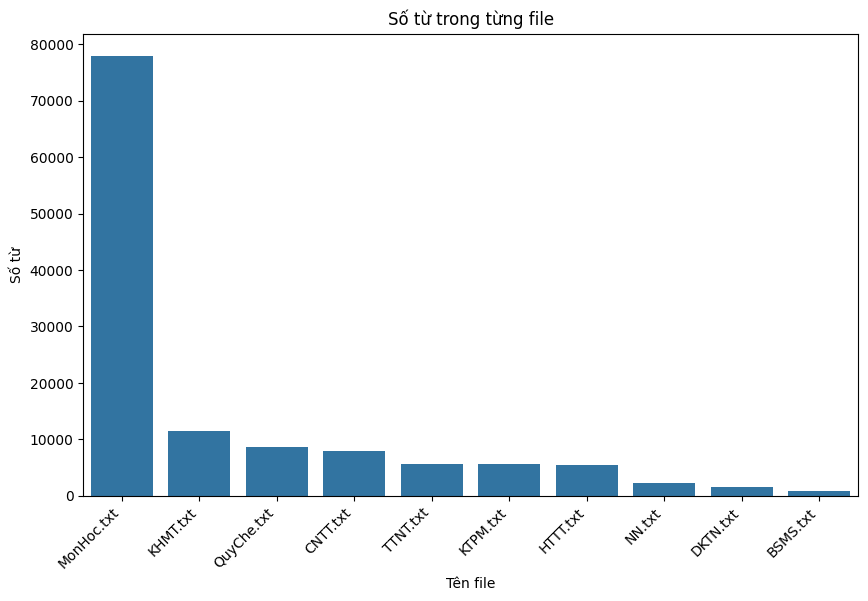

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Biểu đồ thanh số từ trong mỗi file
plt.figure(figsize=(10, 6))
sns.barplot(x='file_name', y='word_count', data=df.sort_values(by='word_count', ascending=False))
plt.title('Số từ trong từng file')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Tên file')
plt.ylabel('Số từ')
plt.show()


In [10]:
from nltk.util import ngrams
from collections import Counter
import pandas as pd

# Danh sách stopwords tiếng Việt
stop_words = set([
    "và", "là", "của", "có", "một", "trong", "những", "này", "với", "cho",
    "tôi", "bạn", "anh", "chị", "đã", "đang", "thì", "sẽ", "nếu", "vậy", "nhưng"
])

# Loại bỏ stopwords khỏi tokens
df['filtered_tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# Hàm tạo cặp từ
def generate_bigrams(tokens):
    return list(ngrams(tokens, 2))

# Tạo cột chứa bigrams cho từng file
df['bigrams'] = df['tokens'].apply(generate_bigrams)

# Gộp tất cả bigrams từ mọi file
all_bigrams = [bigram for bigrams in df['bigrams'] for bigram in bigrams]

# Tính tần suất bigrams
bigram_freq = Counter(all_bigrams)

# Chuyển bigrams thành DataFrame
bigram_df = pd.DataFrame(bigram_freq.items(), columns=['bigram', 'frequency']).sort_values(by='frequency', ascending=False)
print(bigram_df.head(10))


            bigram  frequency
1343   (học, phần)       2429
1143    (tín, chỉ)       1242
1342    (Tên, học)        866
385     (dữ, liệu)        813
1352     (Số, tín)        722
1349     (Mã, học)        714
141   (sinh, viên)        577
1355   (Loại, học)        529
974    (phần, mềm)        512
449    (ứng, dụng)        461


<ipython-input-11-d17969c2cec1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_bigrams['bigram_str'] = top_bigrams['bigram'].apply(lambda x: ' '.join(x))
<ipython-input-11-d17969c2cec1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='bigram_str', data=top_bigrams, palette='viridis')


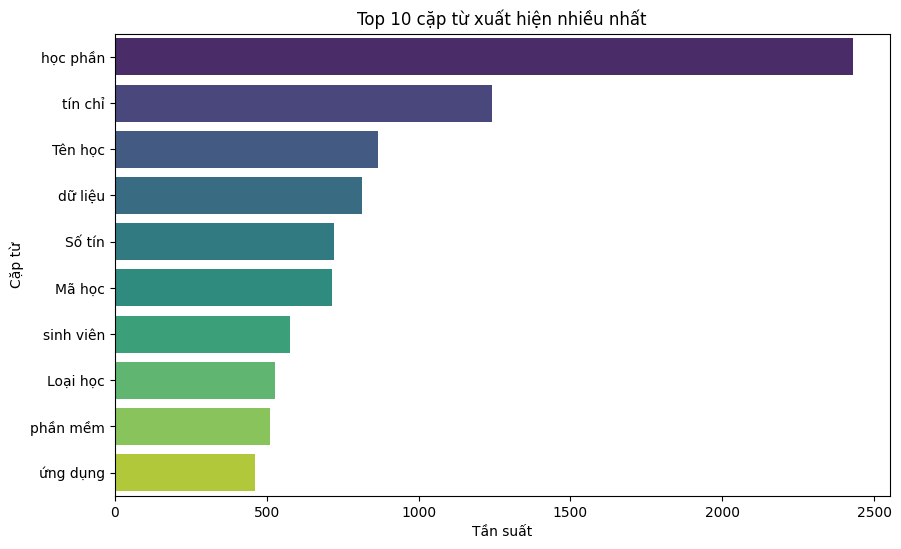

In [11]:
# Chọn top 10 cặp từ phổ biến nhất
top_bigrams = bigram_df.head(10)

# Chuyển bigrams thành chuỗi để hiển thị dễ hơn
top_bigrams['bigram_str'] = top_bigrams['bigram'].apply(lambda x: ' '.join(x))

# Vẽ biểu đồ thanh
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='bigram_str', data=top_bigrams, palette='viridis')
plt.title('Top 10 cặp từ xuất hiện nhiều nhất')
plt.xlabel('Tần suất')
plt.ylabel('Cặp từ')
plt.show()


In [12]:
# Tạo unigram
df['unigrams'] = df['tokens']

# Tạo trigram
def generate_trigrams(tokens):
    return list(ngrams(tokens, 3))

df['trigrams'] = df['tokens'].apply(generate_trigrams)

# Tính tần suất unigrams và trigrams
trigram_freq = Counter([trigram for trigrams in df['trigrams'] for trigram in trigrams])

# Chuyển đổi sang DataFrame
trigram_df = pd.DataFrame(trigram_freq.items(), columns=['trigram', 'frequency']).sort_values(by='frequency', ascending=False)

print("Top 10 trigrams:")
print(trigram_df.head(10))


Top 10 trigrams:
                  trigram  frequency
1900     (Tên, học, phần)        866
1911       (Số, tín, chỉ)        721
1907      (Mã, học, phần)        714
1915    (Loại, học, phần)        529
2135        (tín, chỉ, 4)        442
2009      (học, phần, Tự)        326
2010     (phần, Tự, chọn)        326
2136       (chỉ, 4, Loại)        320
2137       (4, Loại, học)        320
12029  (học, phần, tiếng)        305


<ipython-input-13-e08294ee6b8e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=trigrams, palette='magma')


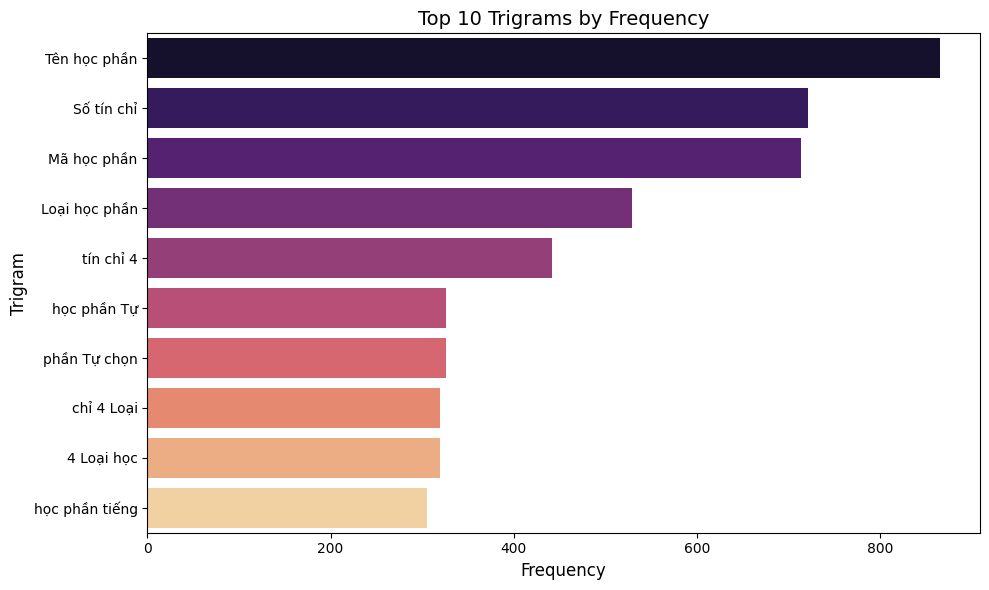

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lấy top 10 trigram từ trigram_df
top_trigrams = trigram_df.head(10)

# Tách các trigram và tần suất
trigrams = [' '.join(trigram) for trigram in top_trigrams['trigram']]
frequencies = top_trigrams['frequency']

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x=frequencies, y=trigrams, palette='magma')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Trigram', fontsize=12)
plt.title('Top 10 Trigrams by Frequency', fontsize=14)
plt.tight_layout()
plt.show()


In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.util import ngrams
from collections import Counter

# Danh sách stopwords tiếng Việt
stop_words = set([
    "và", "là", "của", "có", "một", "trong", "những", "này", "với", "cho",
    "tôi", "bạn", "anh", "chị", "đã", "đang", "thì", "sẽ", "nếu", "vậy", "nhưng"
])

# Giả sử df chứa một cột 'tokens' với các token đã phân tách từ văn bản
# Ví dụ: df = pd.DataFrame({'tokens': [['tôi', 'yêu', 'bạn'], ['hôm', 'nay', 'là', 'ngày', 'tốt']]})

# Loại bỏ stopwords khỏi tokens
df['filtered_tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# Chuyển tokens thành chuỗi văn bản cho TfidfVectorizer
df['filtered_text'] = df['filtered_tokens'].apply(lambda tokens: ' '.join(tokens))

# Áp dụng TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['filtered_text'])

# Chuyển TF-IDF matrix thành DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out(), index=df.index)

# Hiển thị kết quả
print("TF-IDF Matrix:")
print(tfidf_df)

# Hiển thị từ có trọng số cao nhất cho từng văn bản
for i, row in tfidf_df.iterrows():
    print(f"\nTop words for document {i}:")
    top_words = row.sort_values(ascending=False).head(5)
    print(top_words)


TF-IDF Matrix:
         00        01  012014ttbgddt        02        03        04        05  \
0  0.000000  0.003524       0.000000  0.000000  0.003863  0.002121  0.000000   
1  0.000000  0.000000       0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.003362  0.006807       0.000000  0.001996  0.007462  0.000000  0.005001   
3  0.000000  0.014082       0.011591  0.020649  0.005145  0.005650  0.000000   
4  0.000000  0.004069       0.000000  0.000000  0.003568  0.000980  0.002989   
5  0.000000  0.000577       0.000000  0.000846  0.000211  0.000232  0.000353   
6  0.000000  0.003569       0.000000  0.003489  0.002608  0.001432  0.000000   
7  0.000000  0.018153       0.000000  0.017746  0.000000  0.000000  0.000000   
8  0.000000  0.001727       0.000000  0.000000  0.001894  0.002079  0.000000   
9  0.000000  0.001858       0.000000  0.000000  0.002036  0.002236  0.000000   

         06        07   0792023  ...      ấn        ẩn        ốm       ống  \
0  0.000000  0.000000  0.0

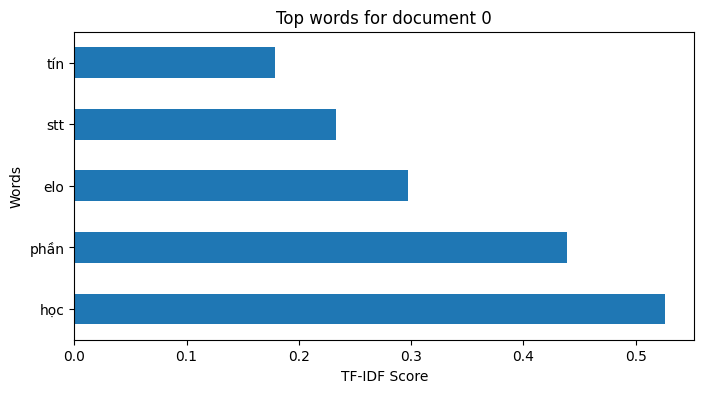

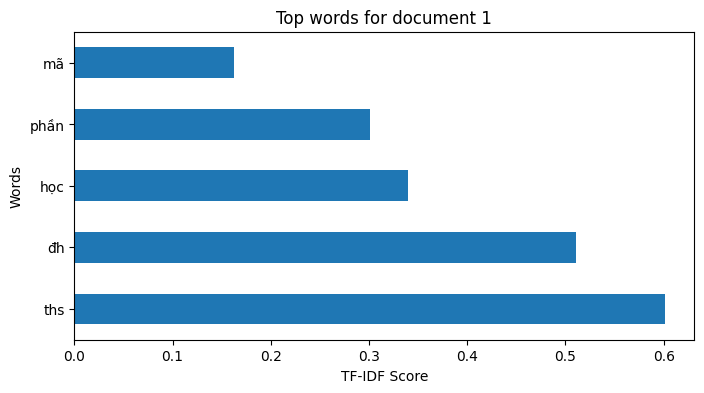

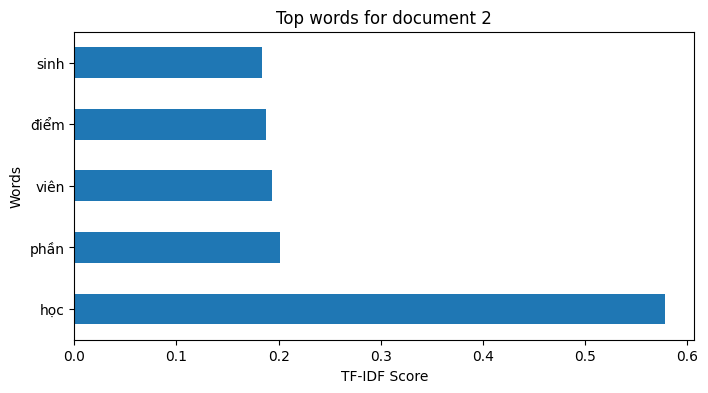

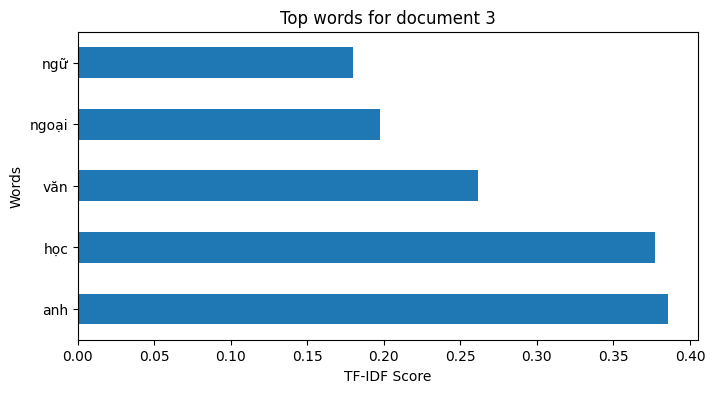

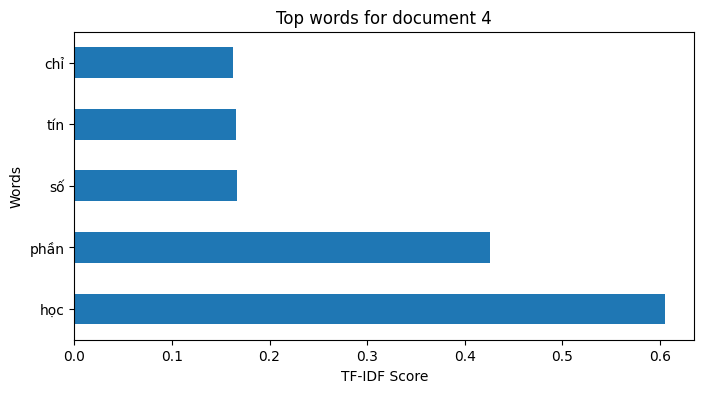

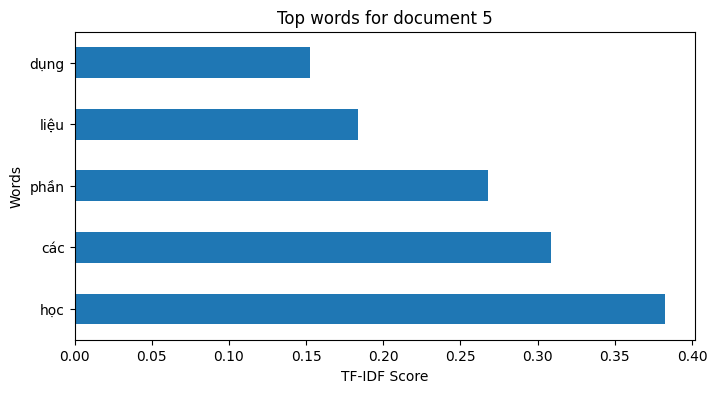

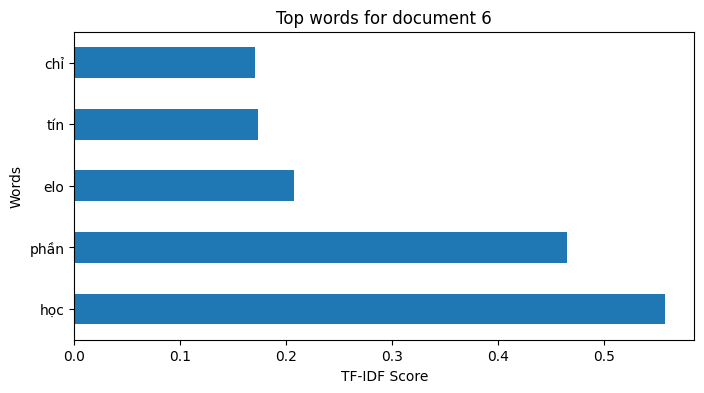

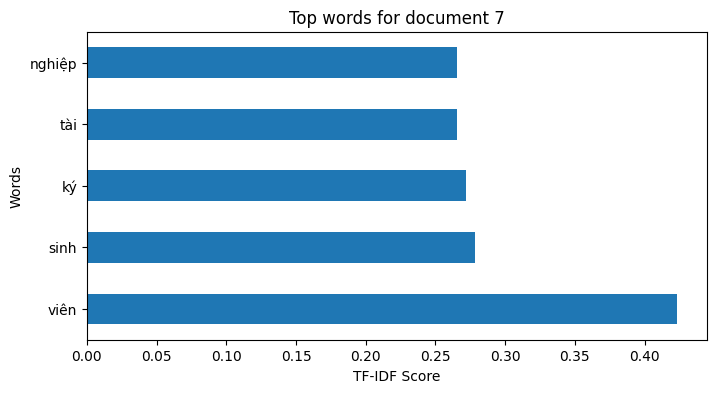

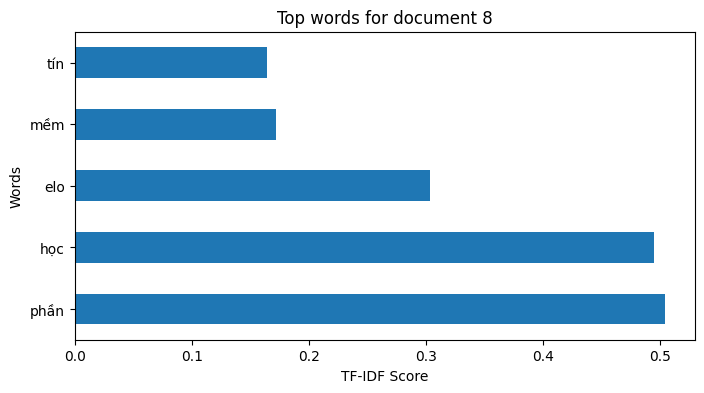

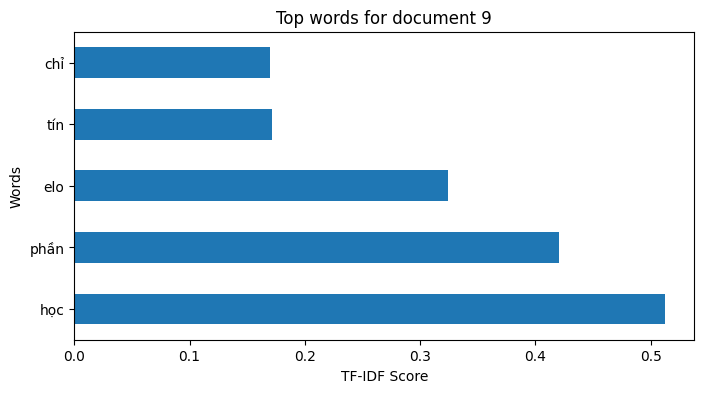

In [16]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ thanh cho từ quan trọng của từng văn bản
for i, row in tfidf_df.iterrows():
    top_words = row.sort_values(ascending=False).head(5)
    plt.figure(figsize=(8, 4))
    top_words.plot(kind='barh', title=f"Top words for document {i}")
    plt.xlabel("TF-IDF Score")
    plt.ylabel("Words")
    plt.show()


In [17]:
corpus = df['cleaned_content'].tolist()

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Khởi tạo TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Tính độ tương đồng cosine giữa các văn bản
cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Chuyển thành DataFrame để dễ trực quan hoá
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=df['file_name'], columns=df['file_name'])

# In ma trận tương đồng
print(cosine_sim_df)


file_name   TTNT.txt  BSMS.txt  QuyChe.txt    NN.txt  KHMT.txt  MonHoc.txt  \
file_name                                                                    
TTNT.txt    1.000000  0.496442    0.614557  0.444743  0.930342    0.651495   
BSMS.txt    0.496442  1.000000    0.291975  0.216160  0.496699    0.314118   
QuyChe.txt  0.614557  0.291975    1.000000  0.646798  0.640538    0.622361   
NN.txt      0.444743  0.216160    0.646798  1.000000  0.456651    0.475991   
KHMT.txt    0.930342  0.496699    0.640538  0.456651  1.000000    0.674269   
MonHoc.txt  0.651495  0.314118    0.622361  0.475991  0.674269    1.000000   
CNTT.txt    0.971552  0.507626    0.624374  0.449759  0.972114    0.670009   
DKTN.txt    0.307900  0.107601    0.532488  0.311479  0.323672    0.421965   
KTPM.txt    0.957342  0.466608    0.599042  0.436946  0.927949    0.668721   
HTTT.txt    0.950205  0.458815    0.609445  0.448710  0.938068    0.679789   

file_name   CNTT.txt  DKTN.txt  KTPM.txt  HTTT.txt  
file_name 

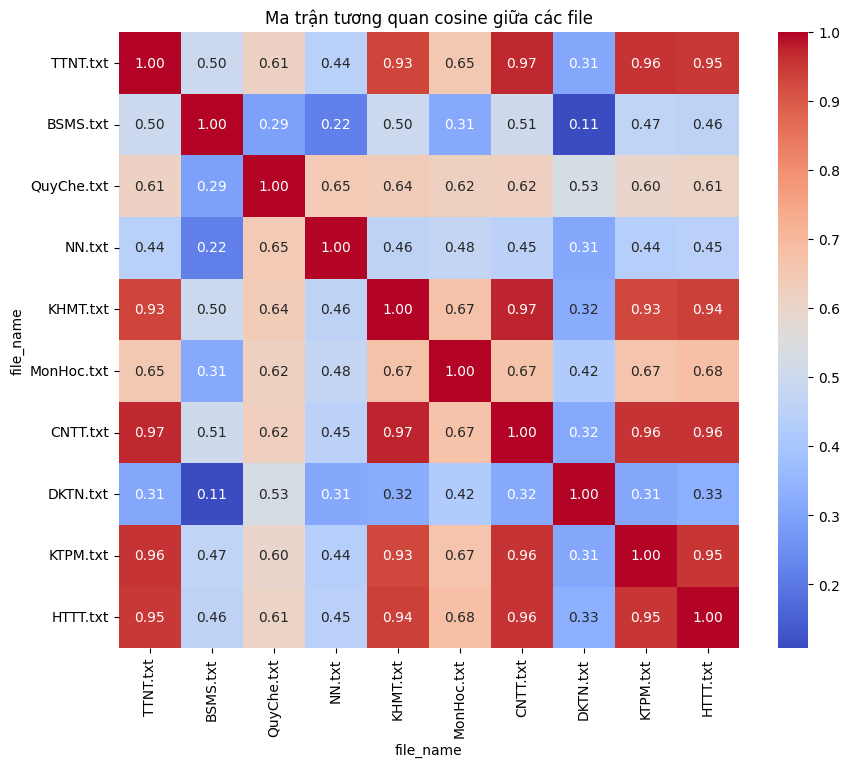

In [19]:
# Vẽ bản đồ nhiệt cho độ tương đồng cosine
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_df, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Ma trận tương quan cosine giữa các file')
plt.show()
